# EDA

**데이터 셋 기본 정보**
- 전체 사람 명 수 : 4,500
- 한 사람당 사진의 개수: 7 (마스크 착용 5장, 이상하게 착용(코스크, 턱스크) 1장, 미착용 1장)
- 이미지 크기: (384, 512)

학습 데이터와 평가 데이터를 구분하기 위해 임의로 섞어서 분할하였다. 60%의 사람들은 학습 데이터셋으로 활용되고, 20%는 public 테스트셋, 그리고 20%는 private 테스트셋으로 사용된다.


**궁금한 점**
- 모든 사진은 정면만 있나?

## 데이터 저장 위치

- **이미지 위치**: '/opt/ml/input/data/train/images'
    - ex. /opt/ml/input/data/train/images/000001_female_Asian_45/normal.jpg
    
- **metadata 위치**: '/opt/ml/input/data/train/train.csv'
    - 내용
|  id  |  gender  |  race  |  age  |  path  |
|:---:|:---:|:---:|:---:|:---:|
|000001|female|Asian|45|000001_female_Asian_45|

In [ ]:
#!pip install seaborn

In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 현재 위치 확인
os.getcwd()

### 인종(race) 정보 확인

In [ ]:
# metadata 가져오기
import pandas as pd
meta_path = '/opt/ml/input/data/train/train.csv'

meta = pd.read_csv(meta_path)
meta.head()

In [ ]:
meta['race'].unique()

▲ **데이터셋 설명에 나온데로 모두 아시아인이다.**

### 나이(age) 정보 확인

In [ ]:
# https://rfriend.tistory.com/411 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]
# Basic Bar Chart

index = meta['age'].value_counts().index
count = meta['age'].value_counts().tolist()

plt.figure(figsize=(20,8))
plt.bar(index, count)
plt.title('Age', fontsize=20)
plt.xlabel('age', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.xticks(index, fontsize=15)
plt.show()

▼ **연령대 별로 확인**
- 30 미만
- 30 이상 60 미만
- 60 이상

In [ ]:
ages = meta['age'].value_counts().index
nums = meta['age'].value_counts().tolist()

age_group = [0, 0, 0]

for age, num in zip(ages, nums):
    if age < 30:
        age_group[0] += num
    elif 30 <= age and age < 60:
        age_group[1] += num
    elif 60 <= age:
        age_group[2] += num

In [ ]:
age_group = np.array(age_group)
age_group*7

In [ ]:
plt.figure(figsize=(8, 4)) 
plt.bar(index, count, color=["#55967e", '#705E78', "#263959"])
plt.xticks(np.arange(3), ['under 30', 'more than 30 and under 60', 'above 60'] )
plt.title('Age Ratio',fontsize= 14)
plt.xlabel('')
plt.ylabel('Number of images')

age_group = np.array(age_group)
#counts_pct = [f'{elem * 100:.2f}%' for elem in age_group / sum(age_group)]
counts_pct = [f'{elem}' for elem in age_group * 7]
for i, v in enumerate(counts_pct):
    plt.text(i, 10, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

In [ ]:
index = ['under 30', 'more than 30 and under 60', 'above 60']
count = age_group

plt.figure(figsize=(10, 4))
plt.bar(index, count)
plt.title('Age', fontsize=20)
plt.xlabel('age', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.xticks(index, fontsize=15)
plt.show()

In [ ]:
age_group

**▲ 60세 이상인 사람에 대한 데이터가 적은 것을 확인할 수 있다. test data에서도 많이 없다면 데이터가 적어도 괜찮을까?**

### 성별(gender) 비율 확인

In [ ]:
meta['gender'].value_counts()

In [ ]:
index = meta['gender'].value_counts().index
count = meta['gender'].value_counts().tolist()

plt.figure(figsize=(8, 5))
plt.bar(index, count)
plt.title('Gender', fontsize=20)
plt.xlabel('gender', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.xticks(index, fontsize=15)
plt.show()

**▲ Train data에는 여성 데이터가 더 많다.**

### 이미지 데이터 확인
https://www.kaggle.com/ishandutta/v5-shopee-indepth-eda-one-stop-for-all-your-needs

In [ ]:
import glob
import os

In [ ]:
# 이미지 path 저장

img_dir = glob.glob('/opt/ml/input/data/train/images/*')
train_images_path = []

for path in img_dir:
    img_path = glob.glob(os.path.join(path, '*'))
    train_images_path.extend(sorted(img_path))
len(train_images_path)

▶ 총 18900 개의 데이터 존재

In [ ]:
!apt-get install libgl1-mesa-glx -y

In [ ]:
import cv2

In [ ]:
# https://www.kaggle.com/ishandutta/v5-shopee-indepth-eda-one-stop-for-all-your-needs
def display_multiple_img(images_paths, rows, cols):
    """
    Function to Display Images from Dataset.
    
    parameters: images_path(string) - Paths of Images to be displayed
                rows(int) - No. of Rows in Output
                cols(int) - No. of Columns in Output
    """
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(20,12) )
    for ind,image_path in enumerate(images_paths):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
            title = image_path.split('/')[-2:]
            title = '_'.join(title[0].split('_')[-3:])+'/'+title[1]
            ax.ravel()[ind].set_title(title)
        except:
            continue;
    plt.tight_layout()
    plt.show()

In [ ]:
s = 100
s -= s%7
display_multiple_img(train_images_path[s:s+35], 5, 7)

### Label Group Exploration
https://www.kaggle.com/ishandutta/v5-shopee-indepth-eda-one-stop-for-all-your-needs

**Class Description:**
<br/>마스크 착용여부, 성별, 나이를 기준으로 총 18개의 클래스가 있다.

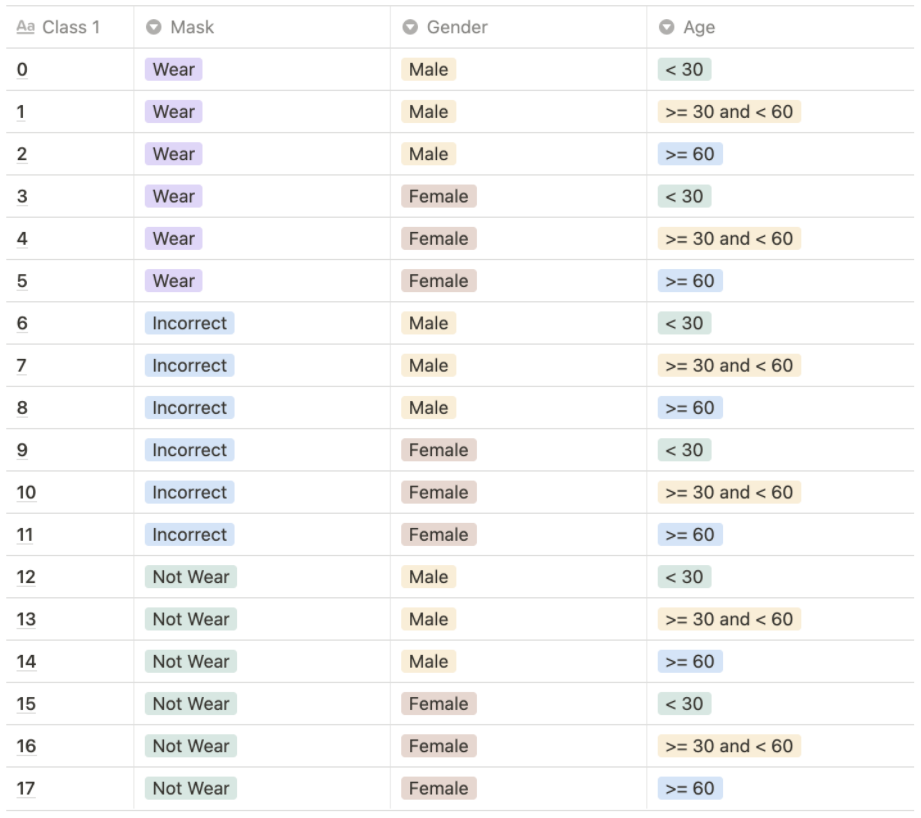

In [ ]:
# 이미지 path 저장

img_dir = glob.glob('/opt/ml/input/data/train/images/*')

class_num = 18
classes = [[] for _ in range(class_num)]

for path in img_dir:
    # gender와 age에 따라 class 설정
    info = path.split('/')[-1].split('_')
    gender, age = info[1], int(info[3])
    c = 0
    if gender == 'female':
        c += 3
        
    if 30 <= age and age < 60:
        c += 1
    elif 60 <= age:
        c += 2
    
    new_c = c
    img_paths = glob.glob(os.path.join(path, '*'))
    for img_path in img_paths:
        c = new_c
        if 'incorrect' in img_path:
            c += 6
        elif 'normal' in img_path:
            c += 12
        classes[c].append(img_path)

In [ ]:
for i in range(18):
    print(i, classes[i][:1])

In [ ]:
class_num = 18
index = []
count = []
for i in range(class_num):
    index.append(i)
    count.append(len(classes[i]))

plt.figure(figsize=(8, 5))
plt.bar(index, count)
plt.title('Class Group Exploration', fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.xticks(index, fontsize=15)
plt.show()

- 우선 Wear : Incorrect : Not Wear = 5 : 1 : 1 이다.
- 이전에 60세 이상인 사람의 데이터가 적은 것을 보았다.
- 남성보다 여성 데이터가 더 많은 것을 보았다.
-------
- 새로운 정보는 없다.
- **각 class의 데이터 개수가 불규칙하면 어떻게 되나..**